[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


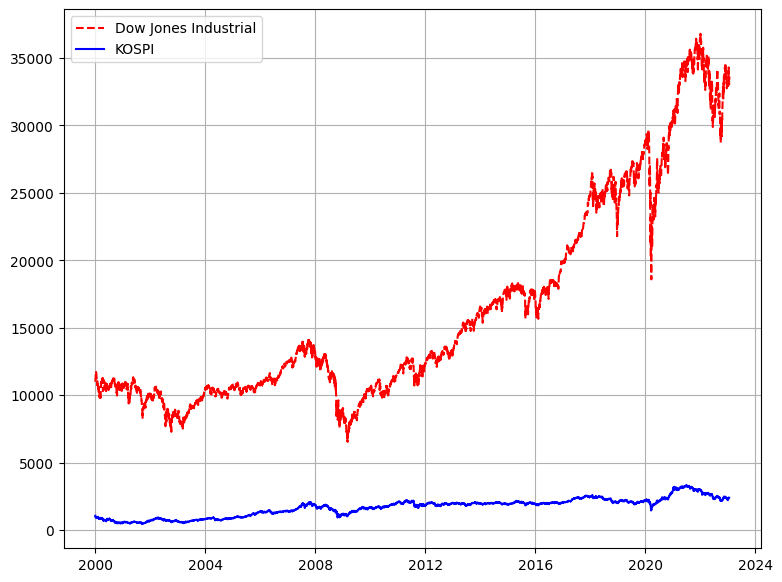

In [4]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

plt.figure(figsize=(9,7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

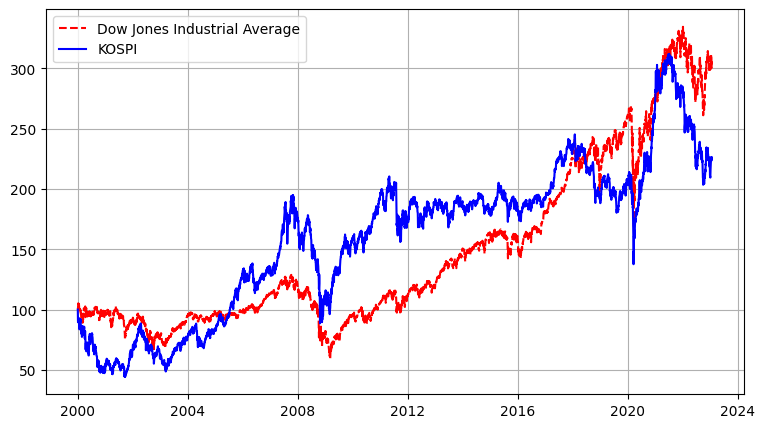

In [5]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [8]:
len(dow); len(kospi)

5687

ValueError: x and y must be the same size

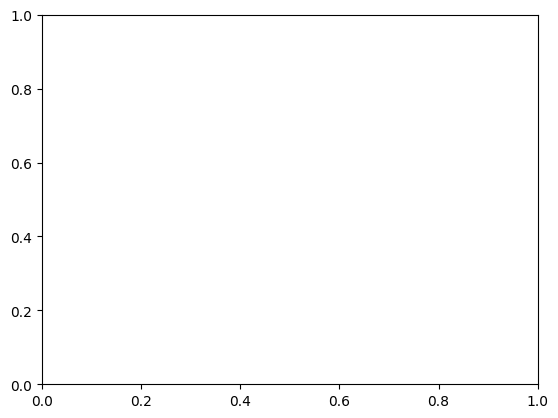

In [12]:
plt.scatter(dow, kospi, marker='.')

In [14]:
import pandas as pd
df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-03 15:00:00+00:00,NaN,1059.040039
2000-01-04 05:00:00+00:00,10997.929688,NaN
2000-01-04 15:00:00+00:00,NaN,986.309998
2000-01-05 05:00:00+00:00,11122.650391,NaN
2000-01-05 15:00:00+00:00,NaN,960.789978
...,...,...
2023-01-18 15:00:00+00:00,NaN,2380.340088
2023-01-19 05:00:00+00:00,33044.558594,NaN
2023-01-19 15:00:00+00:00,NaN,2395.260010


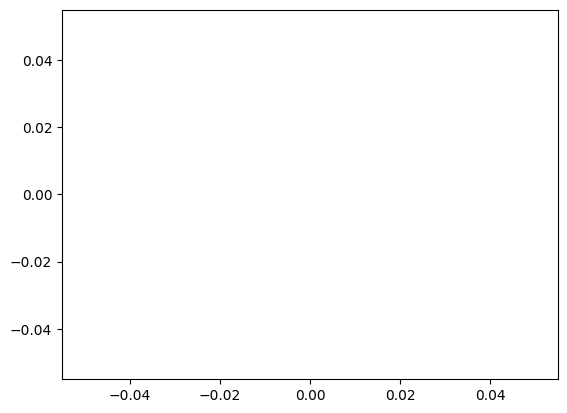

In [15]:
plt.scatter(df['DOW'], df['KOSPI'], marker='.')

In [16]:
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2000-01-03 15:00:00+00:00,10997.929688,1059.040039
2000-01-04 05:00:00+00:00,10997.929688,986.309998
2000-01-04 15:00:00+00:00,11122.650391,986.309998
2000-01-05 05:00:00+00:00,11122.650391,960.789978
2000-01-05 15:00:00+00:00,11253.259766,960.789978
...,...,...
2023-01-18 15:00:00+00:00,33044.558594,2380.340088
2023-01-19 05:00:00+00:00,33044.558594,2395.260010
2023-01-19 15:00:00+00:00,33375.488281,2395.260010


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


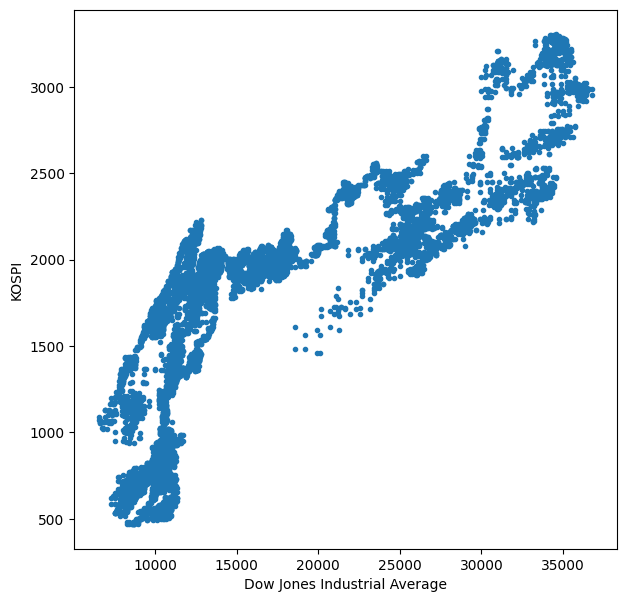

In [17]:
# 위 내용 한번에 정리한 코드 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


In [18]:
# 선형 회기 분석
# model = stats.linregress(독립변수 x, 종속변수 y)

In [19]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07108673183916137, intercept=532.8162307365803, rvalue=0.8217716257512816, pvalue=0.0, stderr=0.0004599464766433037, intercept_stderr=8.304560564377267)

In [ ]:
# LinregressResult
# slope=0.07108673183916137 -> 기울기 
# intercept=532.8162307365803 -> Y절편
# rvalue=0.8217716257512816 -> r값 (상관 계수) 
# pvalue=0.0 -> p값
# stderr=0.0004599464766433037 -> 표준편차 
# intercept_stderr=8.304560564377267
# )

In [20]:
df.corr() # 데이터 프레임으로 본 상관계수

,DOW,KOSPI
DOW,1.000000,0.821772
KOSPI,0.821772,1.000000


In [21]:
df['DOW'].corr(df['KOSPI']) # 시리즈로 구한 상관계수

0.8217716257512816

In [22]:
# 결정계수 : 데이터에서 추정한 회귀선이 실제로 데이터를 어느정도 설명하는지 나타내는 계수
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8217716257512816

In [23]:
r_squared = r_value ** 2
r_squared

0.6753086048899044

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


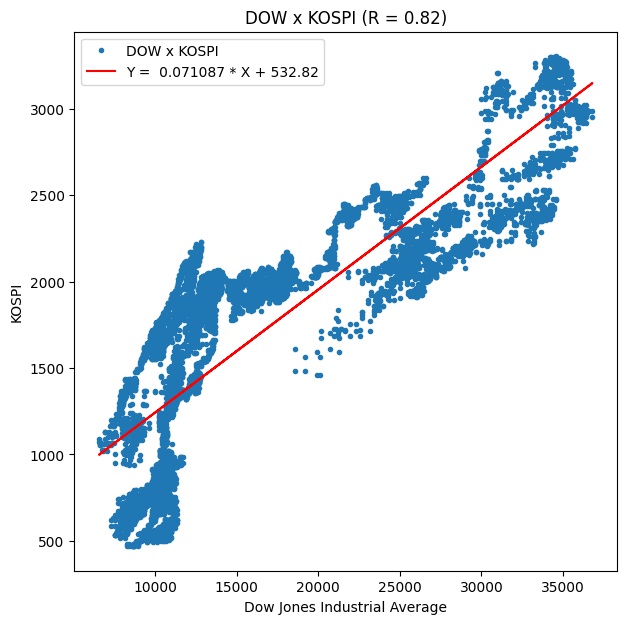

In [28]:
# 위 내용 한번에 정리한 코드 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope: 2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
# plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


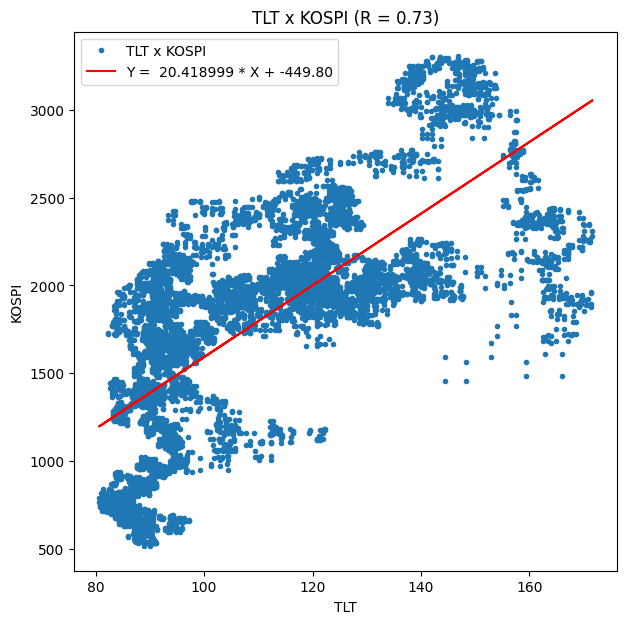

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


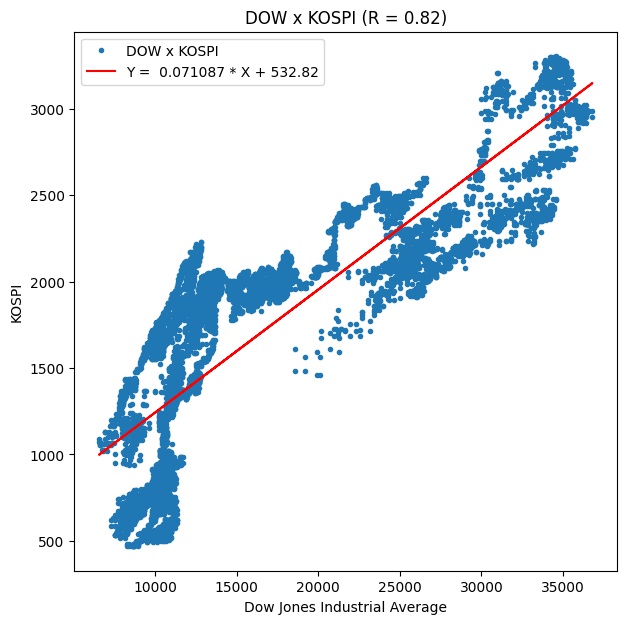

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


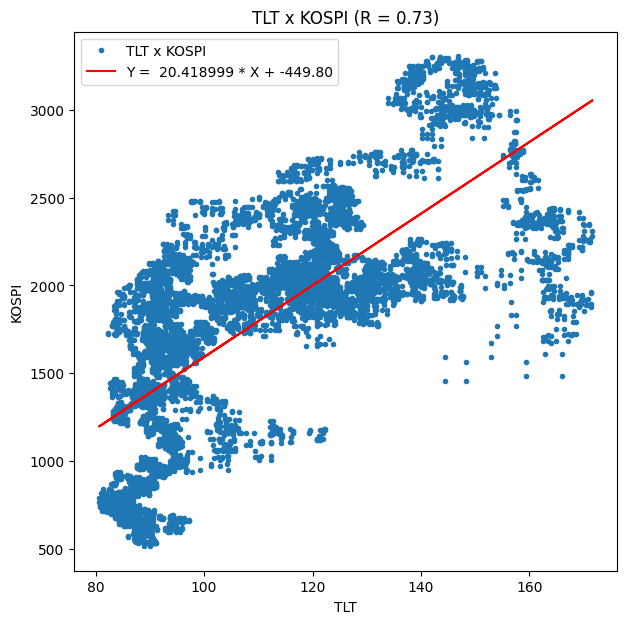

In [30]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope: 2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
# plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

tlt = pdr.get_data_yahoo('TLT', '2002-07-30')
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

df = pd.DataFrame({'X': tlt['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope: 2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:.2f})')
# plt.scatter(df['TLT'], df['KOSPI'], marker='.')
plt.xlabel('TLT')
plt.ylabel('KOSPI')
plt.show()